Assignment #5: Que 6

Submitted by:

Gorkem Sarp

Richa Sharma

In [4]:
## set those accordingly
datadir = 'Datasets/'
abcd_path = datadir+'ABCD/utils/'

In [ ]:
!pip install python-igraph
!pip install umap-learn
!pip install sklearn
!pip install partition_igraph
!pip install python-igraph leidenalg cairocffi
!pip install big-o

In [3]:
import igraph as ig
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import poisson
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import log
from math import factorial
import math
import os
from tqdm import tqdm
import scipy.stats as stats
import networkx as nx
from statistics import mode
from sklearn.metrics import adjusted_mutual_info_score as AMI
import community
import partition_igraph
import itertools
from termcolor import colored

In [ ]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.2/julia-1.2.0-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia; precompile"'
!echo "DONE"


In [6]:
cmd = 'julia '+abcd_path+'install.jl'
os.system(cmd)

0

In [21]:
def graph(node_n):
    nodes = str(node_n)
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 5 15 '+nodes+' 1000'
    os.system(cmd+' >/dev/null 2>&1')
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 30 50 '+nodes+' 1000'
    os.system(cmd+' >/dev/null 2>&1');
    ## viz: ABCD with strong communities
    xi = 0.2
    cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat xi '\
          +str(xi)+' false false'
    os.system(cmd+' >/dev/null 2>&1')
    ## net.dat and comm.dat will be created under contents after running the above line of code

    ## compute AMI for various clustering algorithms
    z = ig.Graph.Read_Ncol('net.dat',directed=False)
    n = z.vcount()
    c = np.loadtxt('comm.dat',dtype='uint16',usecols=(1))
    z.vs['comm'] = [c[int(x['name'])-1]-1 for x in z.vs]
    #print("\nNodes:",n)
    return z

In [ ]:
import timeit
time_array1 = []
time_array2 = []
time_array3 = []
time_array4 = []
time_array5 = []
time_array6 = []
input_array= []
    
for i in [100,200,400,800,1600]:
    ABCD_graph = graph(i)
    
    start_time = timeit.default_timer()
    ECG = AMI(z.community_ecg().membership, z.vs['comm'])  
    end_time = timeit.default_timer() - start_time #calculates run time
    time_array1.append(end_time)

    start_time = timeit.default_timer()
    louvain = AMI(z.community_multilevel().membership, z.vs['comm'])
    end_time = timeit.default_timer() - start_time #calculates run time
    time_array2.append(end_time)

    start_time = timeit.default_timer()
    info_map = AMI(z.community_infomap().membership, z.vs['comm'])  
    end_time = timeit.default_timer() - start_time #calculates run time
    time_array3.append(end_time)

    start_time = timeit.default_timer()
    label_prop =  AMI(z.community_label_propagation().membership, z.vs['comm']) 
    end_time = timeit.default_timer() - start_time #calculates run time
    time_array4.append(end_time)

    start_time = timeit.default_timer()
    GN =  AMI(z.community_edge_betweenness().as_clustering(n=2).membership, z.vs['comm'])
    end_time = timeit.default_timer() - start_time #calculates run time
    time_array5.append(end_time)

    start_time = timeit.default_timer()
    CNM = AMI(z.community_fastgreedy().as_clustering().membership, z.vs['comm']) 
    end_time = timeit.default_timer() - start_time #calculates run time
    time_array6.append(end_time)

    input_array.append(i)


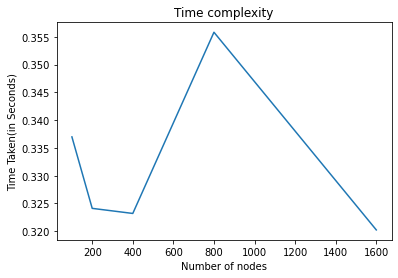

In [54]:
# Time complexity of ECG
plt.title("Time complexity")
plt.xlabel("Number of nodes") 
plt.ylabel("Time Taken(in Seconds)")
plt.plot(input_array,time_array1, label = "ECG")

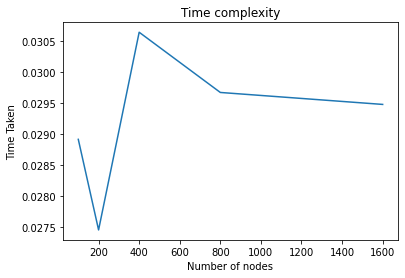

In [49]:
## Time complexity of Louvan
plt.title("Time complexity")
plt.xlabel("Number of nodes") 
plt.ylabel("Time Taken")
plt.plot(input_array,time_array2, label = "Louvain")

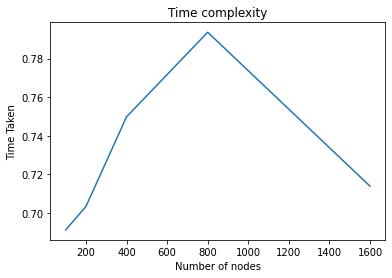

In [50]:
# Time complexity of Info map
plt.title("Time complexity")
plt.xlabel("Number of nodes") 
plt.ylabel("Time Taken")
plt.plot(input_array,time_array3, label = "Info_map")

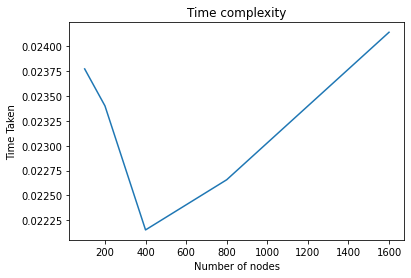

In [51]:
## Time complexity of Label Propagation
plt.title("Time complexity")
plt.xlabel("Number of nodes") 
plt.ylabel("Time Taken")
plt.plot(input_array,time_array4, label = "Label Propagation")

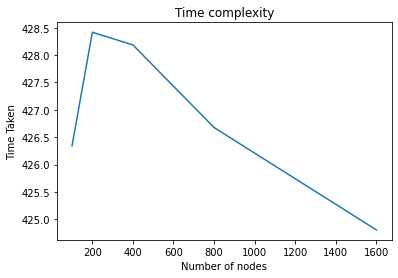

In [52]:
# Time complexity of Girvan Newman
plt.title("Time complexity")
plt.xlabel("Number of nodes") 
plt.ylabel("Time Taken")
plt.plot(input_array,time_array5, label = "GN")

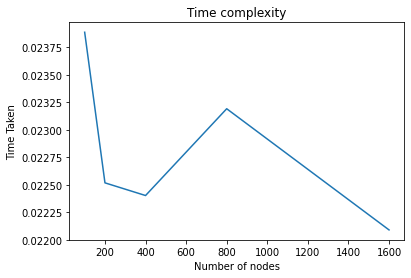

In [53]:
# Time complexity of CNM
plt.title("Time complexity")
plt.xlabel("Number of nodes") 
plt.ylabel("Time Taken")
plt.plot(input_array,time_array6, label = "CNM")

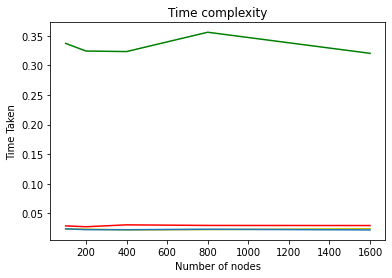

In [47]:
# Time complexity of best performing algorithms
plt.title("Time complexity")
plt.xlabel("Number of nodes") 
plt.ylabel("Time Taken")   
plt.plot(input_array,time_array1,'g', label = "ECG")
plt.plot(input_array,time_array2, 'r',label = "Louvain")
plt.plot(input_array,time_array4, 'y',label = "Label Propagation")
plt.plot(input_array,time_array6, label = "CNM")

GNM is taking long time to run, hence has the time complexity of 428.5 seconds and by looking at the individual graph of CNM we can say that the time complexity is around 0.023 seconds which is better than all other algorithms. And Second best algorithm is Label Propagation which has time complexity of around 0.024 seconds for worst case scanario. 


Though we could not draw the big O complexity of the graphs here so cann't tell which algorithm is taking constant time, logrithmic time, polinomial or exponantial time.. 